<a href="https://colab.research.google.com/github/jfgf11/Examen-2-Machine/blob/master/examen2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Examen 2




In [1]:
#Se monta el Drive para importar y guardar los datos y modelos.
from google.colab import drive
drive.mount('/content/drive')#,force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Instalación

In [2]:
#Se instalan las librerías que se necesitan.
!pip install pyEDFlib
!pip install progressbar2
!pip install matplotlib --upgrade
!pip install h5py

     |████████████████████████████████| 1.1MB 3.5MB/s 
  Created wheel for pyEDFlib: filename=pyEDFlib-0.1.15-cp36-cp36m-linux_x86_64.whl size=920135 sha256=7189adc09eb4e38fb4d0eb5463dd4c649ae614ad9e8ec5dfd2e38de9b6163b5c
  Stored in directory: /root/.cache/pip/wheels/57/e3/8e/ce6236e9ada08b8ff91ef922c7418dbd66f1182dfbb22f8579
Successfully built pyEDFlib
     |████████████████████████████████| 13.1MB 189kB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: matplotlib 3.1.1
    Uninstalling matplotlib-3.1.1:
      Successfully uninstalled matplotlib-3.1.1


#Librerías

In [1]:
#Se importan las librerías requeridas.
#Se deben primero instalar las librerías que hacen falta con la celda en la
#sección de Instalación.
%tensorflow_version 1.x
import tensorflow as tf
import tensorflow.keras as keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import AveragePooling1D
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Reshape
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras import optimizers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Model
from tensorflow.keras.utils import model_to_dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

import pandas as pd
import pyedflib as pyedf
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from tqdm import tqdm
import seaborn as sns
import progressbar
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler

import itertools

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


#Clases

In [0]:
#Esta no esta terminada.

#Clase utilizada para presentar los resultados de los modelos.
#En esta se incluyen una gráfica de la historia de entrenamiento y validación,
#
class Resultados:
    def __init__(self, p_y_pred, p_y_true, pHist):
        self.y_pred = p_y_pred
        self.y_true = p_y_true
        self.hist = pHist

    # def convertirClases(self):
    #   #Esto depronto no lo vamos a usar.
    #   self.y_pred_convertidos = ((self.y_pred == 1) + (self.y_pred == 2)) + 2*((self.y_pred == 3) + (self.y_pred == 4)) + 3*(self.y_pred == 5)
    #   self.y_true_convertidos = ((self.y_true == 1) + (self.y_true == 2)) + 2*((self.y_true == 3) + (self.y_true == 4)) + 3*(self.y_true == 5)

    def darEtiqueta(self, pEstadoSueno):
      et = 0

      if(pEstadoSueno == "Sleep stage 1"):
        et = 1
      elif(pEstadoSueno == "Sleep stage 2"):
        et = 2
      elif(pEstadoSueno == "Sleep stage 3"):
        et = 3
      elif(pEstadoSueno == "Sleep stage 4"):
        et = 4
      elif(pEstadoSueno == "Sleep stage R"):
        et = 5
      else:
        print("Primero eliminar la clase desconocida.")
      
      return et
      
    def darEstadosSueno(self, pEtiquetas):
      estados = pEtiquetas 

      estados[estados == 0] = "Despierto"
      estados[estados == 1] = "Sueño ligero"
      estados[estados == 2] = "Sueño profundo"
      estados[estados == 3] = "Sueño REM"
      
      return estados

    def graficarMatrizConfusion(self):
      cm = confusion_matrix(self.y_true, self.y_pred)#, self.labels)
      #print(cm)
      #estados = self.darEstadosSueno(np.array([0, 1, 2, 3]))
      
      ax = sns.heatmap(cm, annot = True, cbar = False); #annot=True to annotate cells
      
      #plt.ylim()
      #plt.ylim(bottom = 3.5, top = -0.5)
      ax.xaxis.tick_top()
      plt.xlabel("Clase Prediccion")
      plt.ylabel("Clase Verdadera")
      plt.title("Matriz de Confusion")

      plt.show()


    def graficarNoches(self, pPred, pTrue):
      tiempo = np.arange(0, len(pPred)*30, 30)
      estados = darEstadosSueno(np.array([0, 1, 2, 3]))

      plt.plot(tiempo, pPred, label = "Predicciones Modelo")
      plt.plot(tiempo, pTrue, label = "Etiquetas Experto")
      plt.set_yticklabels(estados)
      plt.xlabel("Tiempo (s)")
      plt.ylabel("Estado de Sueño")
      plt.title("Estado del Sueño en una Noche")

      plt.show()

    def graficarHistoria(self):
      plt.plot(self.hist.history['sparse_categorical_accuracy'], label = 'Accuracy Entrenamiento')
      plt.plot(self.hist.history['val_sparse_categorical_accuracy'], label = 'Accuracy Validacion')
      plt.xlabel('Epoca')
      plt.ylabel('Accuracy')
      plt.title("Accuracy vs Epoca")
      plt.legend()
      plt.show()

    def calcularError(self):
      error = np.sum(self.y_pred != self.y_true)
      error = error/len(self.y_pred)

      return error

    def calcularF1(self):
      f1 = f1_score(self.y_true, self.y_pred, average = 'micro')
      return f1

    def calcularPrecision(self):
      precision = precision_score(self.y_true, self.y_pred, average = 'micro')
      return precision

    def calcularRecall(self):
      recall = recall_score(self.y_true, self.y_pred, average = 'micro')
      return recall

    def darReporte(self):
      print(classification_report(self.y_true, self.y_pred, labels = np.arange(0, max(self.y_true)+1))


#Lectura de los Datos

In [0]:
rutaDatos = "drive/My Drive/DatosExamen2/processed"

def importarDatos():
  datos = np.zeros((1,3000))
  #datos2 = np.zeros((1,30, 3))
  etiquetas = np.zeros(1)

  p = 0

  with progressbar.ProgressBar(max_value = 15) as bar:
    for i in range(0,2):
        for j in range(0,10):
          if i == 1 and j == 5:
            datos = datos[1:len(datos)]
            #datos2 = datos2[1:len(datos2)]
            etiquetas = etiquetas[1:len(etiquetas)]
            return datos, etiquetas#datos2, etiquetas

          numInferior = str(i) + str(j) + "0"
          numSuperior = str(i) + str(j) + "9"

          temp1 = np.load(rutaDatos + "/Datos1_" + numInferior  + "_" + numSuperior + ".npy")
          temp2 = np.load(rutaDatos + "/Datos2_" + numInferior  + "_" + numSuperior + ".npy")
          temp3 = np.load(rutaDatos + "/Datos3_" + numInferior  + "_" + numSuperior + ".npy")
          #temp2 = np.load(rutaDatos + "/DatosCompletos2_" + numInferior  + "_" + numSuperior + ".npy")
          # temp3 = np.load(rutaDatos + "/Etiquetas_" + numInferior +  "_" + numSuperior + ".npy")

          # datos = np.vstack((datos, temp1))
          #datos2 = np.vstack((datos2, temp2))
          # etiquetas = np.append(etiquetas, temp3)
          
          print("\n")
          print(numInferior)
          print(temp1.shape[0])
          print(temp2.shape[0])
          print(temp3.shape[0])
          
          p+=1
          bar.update(p)
        
  datos = datos[1:len(datos)]
  #datos2 = datos2[1:len(datos2)]
  etiquetas = etiquetas[1:len(etiquetas)]
  
  return datos, etiquetas #datos2, etiquetas

# unosDatos, unosDatos2, unosEtiquetas = importarDatos()
unosDatos, unosEtiquetas = importarDatos()

In [3]:
#Para cargar los datos totales
start = time.time()

unosDatos = np.load("drive/My Drive/DatosExamen2/processed/DatosTotalesCorregidos_020_149.npy")
unosDatos2 = np.load("drive/My Drive/DatosExamen2/processed/DatosTotalesCorregidos2_020_149.npy")
unosEtiquetas = np.load("drive/My Drive/DatosExamen2/processed/EtiquetasTotalesCorregidas_020_149.npy")

print("Tiempo: {} segundos".format(time.time() - start))

print(unosDatos2.shape)

Tiempo: 255.85004329681396 segundos
(124643, 30, 3)


In [0]:
filenameDatos = "drive/My Drive/sleep-cassette"
filenameDescripcion = "drive/My Drive/SC-subjects.xls"

ArchivoLightsOff=pd.read_excel(filenameDescripcion, sheet_name='Blad1')

TiempoLightsOff=ArchivoLightsOff["LightsOff"].values
TiempoLightsOffSegundos=TiempoLightsOff
HorasSuenio=8

for i in range (0, len(TiempoLightsOff)):
  segundos=int(TiempoLightsOff[i].hour) * 3600 + int(TiempoLightsOff[i].minute) * 60
  TiempoLightsOffSegundos[i]=segundos

listaArchivos = os.listdir(filenameDatos)

listaHypnograms = [i for i in listaArchivos if "Hypnogram" in i] 
listaPSGs = [i for i in listaArchivos if "PSG" in i]

listaHypnograms.sort()
listaPSGs.sort()

# print("Importando datos...")

start = time.time()

Datos1=np.zeros(3000)
Datos2=np.zeros(3000)
Datos3=np.zeros(3000)

Etiquetas=[0]

p = 0
inicioNumArchivos = 20
numArchivos = 130

with progressbar.ProgressBar(max_value=numArchivos*960) as bar:
  for i in range(inicioNumArchivos,inicioNumArchivos+numArchivos):#len(listaHypnograms)):

    hyp = listaHypnograms[i]
    psg = listaPSGs[i]

    #print("Hyp: {}, PSG: {}".format(hyp,psg))

    fileHyp = pyedf.EdfReader(filenameDatos + "/" + hyp)
    filePSG = pyedf.EdfReader(filenameDatos + "/" + psg)

    hypTime, hypDur, hypEtiqueta = fileHyp.readAnnotations()

    tiempoComienzo = fileHyp.starttime_hour*3600+fileHyp.starttime_minute*60+fileHyp.starttime_second
    offset=TiempoLightsOffSegundos[i]-tiempoComienzo
    if offset<0:
      offset+=24*3600
    LimiteSuperior=offset+HorasSuenio*3600
    ventana=30
    tiempo=offset
    j=0
    referenciaSenial=0
    FrecuenciaMuestreo = filePSG.getSampleFrequency(referenciaSenial)

    while tiempo<LimiteSuperior:
      if tiempo>=hypTime[j+1]:
        j+=1
        
      # ventanaMuestra = np.round(FrecuenciaMuestreo * ventana)
      # muestraInicial = np.round(FrecuenciaMuestreo * tiempo)
      # senial1=filePSG.readSignal(0)
      # senial2=filePSG.readSignal(1)
      # senial3=filePSG.readSignal(2)
      # senialActual1=senial1[muestraInicial:muestraInicial+ventanaMuestra]
      # senialActual2=senial2[muestraInicial:muestraInicial+ventanaMuestra]
      # senialActual3=senial3[muestraInicial:muestraInicial+ventanaMuestra]
      
      etiquetaActual=hypEtiqueta[j]
      
      # Datos1=np.vstack((Datos1,senialActual1))
      # Datos2=np.vstack((Datos2,senialActual2))
      # Datos3=np.vstack((Datos3,senialActual3))

      Etiquetas=np.vstack((Etiquetas,etiquetaActual))
      tiempo+=ventana
      p+=1
      bar.update(p)

    fileHyp._close() 
    filePSG._close()
#print(listaHypnograms)
#print(listaPSGs)

Etiquetas = Etiquetas[1:len(Etiquetas)]

N/A% (0 of 124800) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--

Importando datos...


100% (124800 of 124800) |################| Elapsed Time: 0:05:08 Time:  0:05:08


Termino.
Tiempo: 309.40125346183777 segundos.


In [0]:
def appendDatos(pDatos1, pDatos2, pDatos3):
  Datos_Generales=np.zeros((pDatos1.shape[0],3000,3))

  for i in progressbar.progressbar(range(0,pDatos1.shape[0])):
    
    Datos_Generales[i,:,0]=pDatos1[i]
    Datos_Generales[i,:,1]=pDatos2[i]
    Datos_Generales[i,:,2]=pDatos3[i]
    
  return Datos_Generales

Datos1=np.zeros(3000)
Datos2=np.zeros(3000)
Datos3=np.zeros(3000)

for i in range(0, 2):
  for j in range(0, 10):
    if i == 0 and j > 1 or i == 1 and j < 5:
      intervalo = str(i) + str(j) + "0_" + str(i) + str(j) + "9"

      temp1 = np.load("drive/My Drive/DatosExamen2/raw/Datos1_" + intervalo + "_raw.npy")
      temp2 = np.load("drive/My Drive/DatosExamen2/raw/Datos2_" + intervalo + "_raw.npy")
      temp3 = np.load("drive/My Drive/DatosExamen2/raw/Datos3_" + intervalo + "_raw.npy")

      Datos1 = np.vstack((Datos1,temp1))
      Datos2 = np.vstack((Datos2,temp2))
      Datos3 = np.vstack((Datos3,temp3))

Datos1 = Datos1[1:len(Datos1)]
Datos2 = Datos2[1:len(Datos2)]
Datos3 = Datos3[1:len(Datos3)]

DatosCompletosRaw = appendDatos(Datos1, Datos2, Datos3)

print(DatosCompletosRaw.shape)

100% (124800 of 124800) |################| Elapsed Time: 0:00:02 Time:  0:00:02


(124800, 3000, 3)


In [0]:
np.save("drive/My Drive/DatosExamen2/raw/DatosCompletos_020_149_raw", DatosCompletosRaw)
np.save("drive/My Drive/DatosExamen2/raw/EtiquetasCompletas_020_149_raw", Etiquetas)

In [0]:
#Prueba
# DatosCompletosRaw = Etiquetas[Etiquetas != "Sleep stage ?"]

#unosDatos = DatosCompletosRaw[np.array([Etiquetas != "Sleep stage ?"])[0,:,0], :, :]
# unosEtiquetas = Etiquetas[Etiquetas != "Sleep stage ?"]
# test = np.array([Etiquetas == "Sleep stage ?"]).nonzero()
#print(unosDatos.shape)
# print(test)

unosEtiquetasTest = (unosEtiquetas == "Sleep stage 1") + 2*(unosEtiquetas == "Sleep stage 2") + 3*(unosEtiquetas == "Sleep stage 3") + 4*(unosEtiquetas == "Sleep stage 4") + 5*(unosEtiquetas == "Sleep stage R")

In [0]:
# np.save("drive/My Drive/DatosExamen2/processed/DatosTotalesCorregidos_020_149", unosDatos)
np.save("drive/My Drive/DatosExamen2/processed/EtiquetasTotalesCorregidas_020_149", unosEtiquetas)

In [0]:
def eliminarClaseDesconocida(pDatos, pEtiquetas):
  et = []
  dat = np.zeros((3000,3))

  with progressbar.ProgressBar(max_value=numArchivos*960) as bar:
    for i in range(0, len(pEtiquetas)):
      bar.update(i)
      if pEtiquetas[i] != 'Sleep stage ?':
        
        if pEtiquetas[i]=="Sleep stage W":
          et = np.append(et,0)
          dat = np.vstack((dat, pDatos[i,:,:]))
        elif pEtiquetas[i]=="Sleep stage 1":
          et = np.append(et,1)
          dat = np.vstack((dat, pDatos[i,:,:]))
        elif pEtiquetas[i]=="Sleep stage 2":
          et = np.append(et,2)
          dat = np.vstack((dat, pDatos[i,:,:]))
        elif pEtiquetas[i]=="Sleep stage 3":
          et = np.append(et,3)
          dat = np.vstack((dat, pDatos[i,:,:]))
        elif pEtiquetas[i]=="Sleep stage 4":
          et = np.append(et,4)
          dat = np.vstack((dat, pDatos[i,:,:]))
        elif pEtiquetas[i]=="Sleep stage R":
          et = np.append(et,5)
          dat = np.vstack((dat, pDatos[i,:,:]))
        else:
          pass
          #print("Hay una clase distinta a las definidas.")

  dat = dat[1:dat.shape[0]]
  return dat, et

Datos, Etiquetas = eliminarClaseDesconocida(DatosCompletosRaw, Etiquetas)
print(Datos.shape)
np.save("content/drive/My Drive/DatosExamen2/processed/DatosTotalesCorregidos_020_149", Datos)
np.save("content/drive/My Drive/DatosExamen2/processed/EtiquetasTotalesCorregidas_020_149", Etiquetas)

#Preparación de Datos

In [0]:
#Probar under y over sampling
smote = SMOTE(ratio = 'not majority', k_neighbors = 3)
smotetomek = SMOTETomek(ratio = 'not majority')
randomOverSampler = RandomOverSampler(sampling_strategy = 'not majority', random_state = 0)

In [0]:
def convertirClases(pY):
      y = ((pY == 1) + (pY == 2)) + 2*((pY == 3) + (pY == 4)) + 3*(pY == 5)
      #y = pY==1
      return y

#x_train = np.expand_dims(np.transpose(x_train), axis=3) # reshape (569, 30) to (569, 30, 1) 
#x_test = np.expand_dims(np.transpose(x_test), axis=3) # reshape (569, 30) to (569, 30, 1) 

In [0]:
unosEtiquetas = convertirClases(unosEtiquetas)

In [5]:
print("Separando datos en entrenamiento y validacion...")

x_train1, x_test1, y_train, y_test = train_test_split(unosDatos, unosEtiquetas , random_state = 0, test_size=0.20)
x_train2, x_test2 = train_test_split(unosDatos2, unosEtiquetas , random_state = 0, test_size=0.20)[0:2]

print("Termino.")

unosDatos = None

# x_train2, x_test2, y_train2, y_test2 = train_test_split(unosDatos2, unosEtiquetas, random_state = 0, test_size=0.10)
# x_train2, x_test2 = train_test_split(unosDatos2, unosEtiquetas, random_state = 0, test_size=0.20)[0:2]

unosDatos2 = None
unosEtiquetas = None

# print(x_train1.shape)
# print(x_train2.shape)

# unosDatos = None
# unosEtiquetas = None

Separando datos en entrenamiento y validacion...
Termino.


In [6]:
# x_train2 = np.reshape(x_train, (-1, 9000),'F')

x_train1 = np.reshape(x_train1, (-1, 9000),'F')
x_train2 = np.reshape(x_train2, (-1, 90), 'F')

print("Oversampling...")

# x_train2, y_train2 = randomOverSampler.fit_resample(x_train2, y_train2)

# x_train, y_train = smote.fit_resample(x_train, y_train)
x_train2 = randomOverSampler.fit_resample(x_train2, y_train)[0]
x_train1, y_train = randomOverSampler.fit_resample(x_train1, y_train)

print("Reshaping...")

# x_train2 = np.reshape(x_train2, (-1, 3000, 3), 'F')

x_train1 = np.reshape(x_train1, (-1, 3000, 3), 'F')
x_train2 = np.reshape(x_train2, (-1, 30, 3), 'F')

print(x_train1.shape)
print(x_train2.shape)

#print(x_test[0,0:5,0])
#print(test[0,0:5])

Oversampling...
Reshaping...
(262434, 3000, 3)
(262434, 30, 3)


In [0]:
np.array_equal(y_train, y_train2)

In [0]:
#Para obtener los pesos de cada clase
pesosClases = compute_class_weight(class_weight = 'balanced', classes = np.array([0, 1, 2, 3, 4, 5]), y = y_train)

pesosClases = {0: pesosClases[0],
               1: pesosClases[1],
               2: pesosClases[2],
               3: pesosClases[3],
               4: pesosClases[4],
               5: pesosClases[5]}

In [7]:
def encontrarCantidadClase(pEtiquetas, pClase):
  return np.sum(pEtiquetas == pClase)

for i in range(0,6):  
  print(encontrarCantidadClase(y_train, i))

43739
43739
43739
43739
43739
43739


In [0]:
np.save("drive/My Drive/DatosExamen2/processed/DatosOversample_x_train1", x_train1)

print("Ya el largo.")

np.save("drive/My Drive/DatosExamen2/processed/DatosOversample_y_train1", y_train)
np.save("drive/My Drive/DatosExamen2/processed/DatosOversample_x_test1", x_test1)
np.save("drive/My Drive/DatosExamen2/processed/DatosOversample_y_test1", y_test)

print("En 2.")
np.save("drive/My Drive/DatosExamen2/processed/DatosOversample_x_train2", x_train2)
np.save("drive/My Drive/DatosExamen2/processed/DatosOversample_x_test2", x_test2)

In [0]:
datosOversampled = np.load("drive/My Drive/DatosExamen2/processed/DatosOversampled.npz")

x_train1 =  
x_train2 = datosOversampled['x_train2']

x_test1 = datosOversampled['x_test1']
x_test2 = datosOversampled['x_test2']

y_train = datosOversampled['y_train']
y_test = datosOversampled['y_test']

In [0]:
np.savez_compressed("drive/My Drive/DatosExamen2/processed/DatosOversampled", x_train1 = x_train1, x_test1 = x_test1, x_train2 = x_train2, x_test2 = x_test2, y_train = y_train, y_test = y_test)

In [0]:
pesosClases

{0: 0.8538698087930825,
 1: 1.275068767191798,
 2: 0.3802618287333645,
 3: 3.1608340377571147,
 4: 7.809663046505152,
 5: 1.030498447518786}

In [8]:
y_train.shape

(262434,)

#Entrenamiento del Modelo

#Implementación en Keras

Creación del modelo

In [0]:
#Numero de clases
numClases = 6

def crearModelo(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer):
  modelo = Sequential()

  #Esto corresponderia a la parte convolucional.
  modelo.add(Conv1D(pNumFiltros[0], int(pTamFiltros[0]), activation = 'relu', input_shape = (3000,3)))
  # modelo.add(BatchNormalization())
  # modelo.add(Activation('relu'))
  modelo.add(MaxPooling1D(int(pTamPooling[0])))

  modelo.add(Conv1D(pNumFiltros[1], int(pTamFiltros[1]), activation = 'relu'))
  # modelo.add(BatchNormalization())
  # modelo.add(Activation('relu'))
  modelo.add(MaxPooling1D(int(pTamPooling[1])))
  
  modelo.add(Conv1D(pNumFiltros[2], int(pTamFiltros[2]), activation = 'relu'))
  # modelo.add(BatchNormalization())
  # modelo.add(Activation('relu'))
  modelo.add(MaxPooling1D(int(pTamPooling[2])))

  modelo.add(Conv1D(pNumFiltros[3], int(pTamFiltros[3]), activation = 'relu'))
  # modelo.add(BatchNormalization())
  # modelo.add(Activation('relu'))

  #modelo.add(AveragePooling1D(int(pTamPooling[1])))

  # modelo.add(GlobalAveragePooling1D())
  #modelo.add(MaxPooling1D(int(pTamPooling[2])))
  modelo.add(Flatten())

  #Esto corresponderia a la parte de red neuronal normalita. (Puse cualquier cosa por ahora)
  #modelo.add(Dropout(0.5))
  #modelo.add(Dense(pNumNeuronas[0], activation = 'relu'))
 
  
  # modelo.add(Dense(pNumNeuronas[1], activation = 'relu'))#, activity_regularizer=l2(pAlpha)))
  # modelo.add(Dense(pNumNeuronas[2], activation = 'relu', activity_regularizer=l2(pAlpha)))
  #modelo.add(Dense(pNumNeuronas[3], activation = 'relu', activity_regularizer=l2(pAlpha)))

  modelo.add(Dense(numClases, activation = 'softmax'))#, activity_regularizer = l2(pAlpha)))
  
  #modelo.add(Dense(numClases, activation = 'softmax'))

  sgd = optimizers.SGD(lr = pTasa, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.summary()

  return modelo

def crearModelo2(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer):

  capaEntrada = Input(shape = (3000,3))
  # pooling0 = MaxPooling1D(int(pTamPooling[0]), padding='same')(capaEntrada)
  # pooling0 = Reshape((-1, int(pNumFiltros[0])))(pooling0)
  
  capa1 = Conv1D(pNumFiltros[0], int(pTamFiltros[0]), padding='same', activation = 'relu')(capaEntrada)
  pooling1 = MaxPooling1D(int(pTamPooling[1]), padding='same')(capa1)

  capa2 = Conv1D(pNumFiltros[1], int(pTamFiltros[1]), padding='same', activation = 'relu')(capa1)
  pooling2 = MaxPooling1D(int(pTamPooling[2]), padding='same')(capa2)

  capa3 = Conv1D(pNumFiltros[2], int(pTamFiltros[2]), padding='same', activation = 'relu')(capa2)
  pooling3 = MaxPooling1D(int(pTamPooling[3]), padding='same')(capa3)

  capas = concatenate([pooling1, pooling2, pooling3], axis=1)
  # capas = Flatten()(capas)
  #capas = GlobalMaxPooling1D()(capas)
  capas = GlobalAveragePooling1D()(capas)
  # capas = Dropout(0.5)(capas)

  # capa4 = LSTM(pNumNeuronas[0])(capas)
  
  #capa4 = Dense(pNumNeuronas[0], activation='relu')(capas)
  #capaSalida = Dense(numClases, activation='softmax')(capaSalida)
  capaSalida = Dense(numClases, activation='softmax')(capas)

  modelo = Sequential()
  modelo.add(Model(capaEntrada, capaSalida))

  sgd = optimizers.SGD(lr = pTasa)#, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.layers[0].summary()
  
  return modelo

def crearModelo3(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer):
  capaEntrada1 = Input(shape = (3000,3), name = 'entrada1')
  capaEntrada2 = Input(shape = (30, 3), name = 'entrada2')

  capa1_1 = Conv1D(pNumFiltros[0], int(pTamFiltros[0]), activation = 'relu', padding='same')(capaEntrada1)

  pooling1_1 = MaxPooling1D(int(pTamPooling[0]), padding='same')(capa1_1)

  capa2_1 = Conv1D(pNumFiltros[1], int(pTamFiltros[1]), activation = 'relu', padding='same')(pooling1_1)

  pooling2_1 = MaxPooling1D(int(pTamPooling[1]), padding='same')(capa2_1)

  capa3_1 = Conv1D(pNumFiltros[2], int(pTamFiltros[2]), activation = 'relu', padding='same')(pooling2_1)

  pooling3_1 = MaxPooling1D(int(pTamPooling[2]), padding='same')(capa3_1)

  capa1_2 = Conv1D(pNumFiltros[5], int(pTamFiltros[5]), activation = 'relu', padding='same')(capaEntrada2)
  pooling1_2 = MaxPooling1D(int(pTamPooling[5]), padding='same')(capa1_2)
  
  capas1 = concatenate([pooling1_1, pooling2_1, pooling3_1])

  capas1 = GlobalAveragePooling1D()(capas1)

  capas = concatenate([capas1, pooling1_2])

  # capas = MaxPooling1D(int(pTamPooling[3]))(capas)
  # capas = Dropout(0.5)(capas)
  # capas = Dense(pNumNeuronas[0], activation = 'softmax')(capas)
  capaSalida = Dense(numClases, activation = 'softmax')(capas)

  #modelo = Sequential()
  modelo = Model(inputs = [capaEntrada1, capaEntrada2], outputs = capaSalida)

  sgd = optimizers.SGD(lr = pTasa)#, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.summary()

  return modelo

def crearModelo4(pTasa, pAlpha, pNumFiltros, pTamFiltros, pTamPooling, pNumNeuronas, pOptimizer):
  capaEntrada1 = Input(shape = (3000,3), name = 'entrada1')
  capaEntrada2 = Input(shape = (30, 3), name = 'entrada2')

  capa1_1 = Conv1D(pNumFiltros[0], int(pTamFiltros[0]), activation = 'relu', padding='same')(capaEntrada1)

  pooling1_1 = MaxPooling1D(int(pTamPooling[0]), padding='same')(capa1_1)

  capa2_1 = Conv1D(pNumFiltros[1], int(pTamFiltros[1]), activation = 'relu', padding='same')(capa1_1)

  pooling2_1 = MaxPooling1D(int(pTamPooling[1]), padding='same')(capa2_1)

  capa3_1 = Conv1D(pNumFiltros[2], int(pTamFiltros[2]), activation = 'relu', padding='same')(capa2_1)

  pooling3_1 = MaxPooling1D(int(pTamPooling[2]), padding='same')(capa3_1)

  capa1_2 = Conv1D(pNumFiltros[5], int(pTamFiltros[5]), activation = 'relu', padding='same')(capaEntrada2)
  pooling1_2 = MaxPooling1D(int(pTamPooling[5]), padding='same')(capa1_2)
  
  flatten1 = Flatten()(pooling3_1)
  flatten2 = Flatten()(pooling1_2)

  capas = concatenate([flatten1, flatten2])

  # capas = MaxPooling1D(int(pTamPooling[3]))(capas)
  # capas = Dropout(0.5)(capas)
  # capas = Dense(pNumNeuronas[0], activation = 'softmax')(capas)
  capaSalida = Dense(numClases, activation = 'softmax')(capas)

  #modelo = Sequential()
  modelo = Model(inputs = [capaEntrada1, capaEntrada2], outputs = capaSalida)

  sgd = optimizers.SGD(lr = pTasa)#, momentum=0.9)
  adam = optimizers.Adam(learning_rate = pTasa)
  if pOptimizer == "adam":
    opt=adam
  elif pOptimizer =="sgd":
    opt=sgd
  elif pOptimizer =="rmsprop":
    opt = "rmsprop"
  
  modelo.compile(loss='sparse_categorical_crossentropy', optimizer = opt, metrics = ['sparse_categorical_accuracy'])
  modelo.summary()

  return modelo


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 3000, 3)]    0                                            
__________________________________________________________________________________________________
conv1d_14 (Conv1D)              (None, 3000, 100)    2500        input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_15 (Conv1D)              (None, 3000, 100)    80100       conv1d_14[0][0]                  
__________________________________________________________________________________________________
conv1d_16 (Conv1D)              (None, 3000, 100)    80100       conv1d_15[0][0]                  
____________________________________________________________________________________________

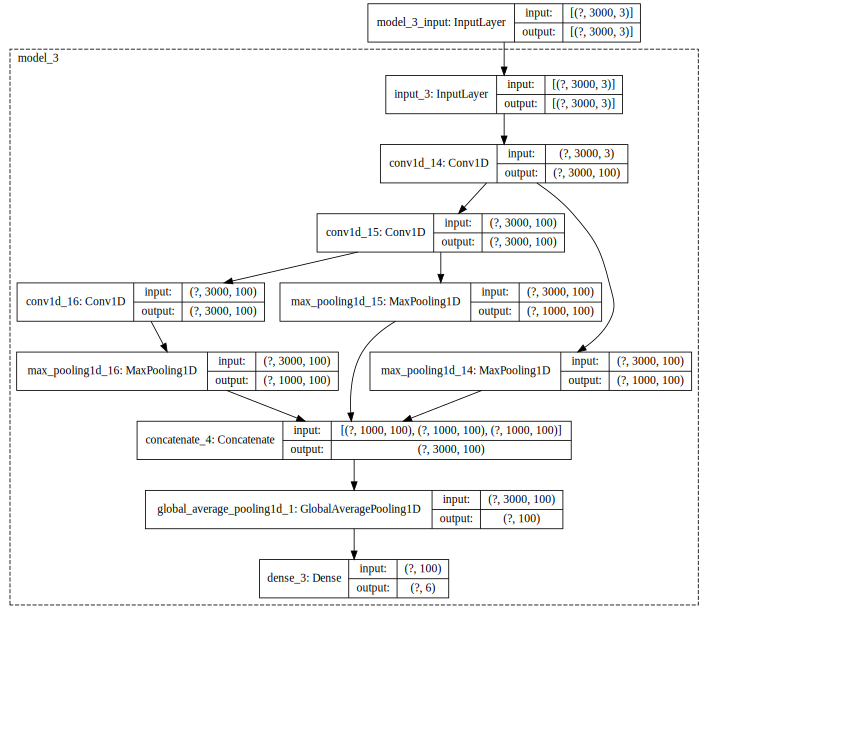

In [17]:
numFiltros = np.array([100, 100, 100, 100, 100, 100])
tamFiltros = np.array([8, 8, 8, 8, 8, 8])
tamPooling = np.array([3, 3, 3, 3, 3, 3])
optimizer="adam"
numNeuronas = np.array([10, 20, 10])

tasa = 0.001
alpha = 0.01

modelo = crearModelo2(tasa, alpha, numFiltros, tamFiltros, tamPooling, numNeuronas, optimizer)

#Esta linea muestra un diagrama de la red neuronal.
SVG(model_to_dot(modelo, show_shapes = True, expand_nested = True, dpi = 60).create(prog='dot', format='svg'))

In [18]:
epocas = 4
batchSize = 512#512
# hist = modelo.fit(x_train, y_train, verbose = 1, validation_data=(x_test, y_test), epochs = epocas, batch_size = batchSize)
# hist = modelo.fit(x_train, y_train, verbose = 1, validation_data=(x_test, y_test), epochs = epocas, batch_size = batchSize, class_weight = pesosClases)

#Esta es para crearModelo3.

hists = []
hist = None

for i in range(0,1):
  # hist = modelo.fit(x_train, y_train, verbose = 1, validation_data=(x_test, y_test), epochs = epocas, batch_size = batchSize)#, class_weight = pesosClases)
# # hist = modelo.fit([x_train1, x_train2], y_train, validation_data=([x_test1, x_test2], y_test), epochs = epocas, batch_size = batchSize)#, class_weight = pesosClases)
  hist = modelo.fit([x_train1, x_train2], y_train, verbose = 1, validation_data=([x_test1, x_test2], y_test), epochs = epocas, batch_size = batchSize)
  
  hists.append(hist)

  rutaModelo = "drive/My Drive/ModelosExamen2/Modelo6.json"
  rutaPesos = "drive/My Drive/ModelosExamen2/PesosModelo6.h5"
  rutaDiagrama = "drive/My Drive/ModelosExamen2/DiagramaModelo6.png"

  # guardarModelo(modelo, rutaModelo, rutaPesos, rutaDiagrama)

  y_prob = modelo.predict([x_train1, x_train2])
  y_pred = y_prob.argmax(axis=-1)
                        
  resultadosEntrenamiento = Resultados(y_train, y_pred, hist)
  resultadosEntrenamiento.graficarHistoria()

  y_prob = modelo.predict([x_test1, x_test2])
  y_pred = y_prob.argmax(axis=-1)
                        
  resultadosValidacion = Resultados(y_test, y_pred, hist)

  resultadosEntrenamiento.darReporte()
  resultadosValidacion.darReporte()
  
  resultadosEntrenamiento.graficarMatrizConfusion()
  resultadosValidacion.graficarMatrizConfusion()

Train on 262434 samples, validate on 24929 samples
Epoch 1/4
 30720/262434 [==>...........................] - ETA: 44:39 - loss: 1.6506 - sparse_categorical_accuracy: 0.3229

KeyboardInterrupt: ignored

In [0]:
def guardarModelo(pModelo, pRutaModelo, pRutaPesos, pRutaDiagrama):
  modelo_json = pModelo.to_json()

  with open(pRutaModelo, "w") as archivo_json:
      archivo_json.write(modelo_json)

  pModelo.save_weights(pRutaPesos)

  plot_model(pModelo, to_file = pRutaDiagrama, show_shapes = True)

def cargarModelo(pRutaModelo, pRutaPesos):
  archivo_json = open(pRutaModelo, 'r')
  modelo_json = archivo_json.read()
  archivo_json.close()
  modelo = model_from_json(modelo_json)

  modelo.load_weights(pRutaPesos)

  return modelo

In [0]:
rutaModelo = "drive/My Drive/ModelosExamen2/Modelo.json"
rutaPesos = "drive/My Drive/ModelosExamen2/PesosModelo.h5"
rutaDiagrama = "drive/My Drive/ModelosExamen2/DiagramaModelo.png"

In [0]:
guardarModelo(modelo, rutaModelo, rutaPesos)

In [0]:
numFiltros = np.array([100, 50, 20])
tamFiltros = np.array([6, 6, 6])
tamPooling = np.array([6, 6, 6])
optimizer="adam"
numNeuronas = np.array([10, 8, 6])

parametros = dict(batch_size = [30],
               epochs = [5],
               pOptimizer = ["adam", "sgd"],#,"rmsprop"],
               pTasa = [0.01],
               pAlphas = [0.001],
               pNumFiltros = [numFiltros],
              pTamFiltros = [tamFiltros],
              pTamPooling = [tamPooling],
              pNumNeuronas = [numNeuronas]
              )

In [0]:
def GridSearch(pXtrain, pYtrain, pXtest, pYtest, pParameters):
  i=0
  parameters = []
  bestScore = 0
  bestModel=None
  bestHist = None
  contador=0
  for k in parametros.keys():
    parameters.append(pParameters.get(k))
  with progressbar.ProgressBar(max_value=len(list(itertools.product(*parameters)))) as bar:
    for p in itertools.product(*parameters):
      contador=+1
      bar.update(contador)
      modelo=crearModelo(p[3],p[4],p[5],p[6],p[7],p[8], p[2])
      hist = modelo.fit(pXtrain, pYtrain, verbose = 1, validation_data=(pXtest, pYtest), epochs = p[1], batch_size = p[0])
      l, score =modelo.evaluate(pXtest,pYtest)
      if score>bestScore:
        bestScore = score
        bestModel = modelo
        bestHist = hist
  return bestScore, bestModel, bestHist

N/A% (0 of 2) |                          | Elapsed Time: 0:00:00 ETA:  --:--:--

Train on 7977 samples, validate on 887 samples
Epoch 1/5
7977/7977 [==============================] - 3s 361us/sample - loss: 1.6520 - sparse_categorical_accuracy: 0.3236 - val_loss: 1.6377 - val_sparse_categorical_accuracy: 0.2954
Epoch 2/5
7977/7977 [==============================] - 2s 302us/sample - loss: 1.6042 - sparse_categorical_accuracy: 0.3412 - val_loss: 1.6478 - val_sparse_categorical_accuracy: 0.2954
Epoch 3/5
7977/7977 [==============================] - 2s 304us/sample - loss: 1.6057 - sparse_categorical_accuracy: 0.3421 - val_loss: 1.6405 - val_sparse_categorical_accuracy: 0.2954
Epoch 4/5
7977/7977 [==============================] - 2s 305us/sample - loss: 1.6134 - sparse_categorical_accuracy: 0.3273 - val_loss: 1.6373 - val_sparse_categorical_accuracy: 0.2954
Epoch 5/5
887/887 [==============================] - 0s 143us/sample - loss: 1.6402 - sparse_categorical_accuracy: 0.2954


 50% (1 of 2) |#############             | Elapsed Time: 0:00:13 ETA:   0:00:13

Train on 7977 samples, validate on 887 samples
Epoch 1/5
7977/7977 [==============================] - 3s 349us/sample - loss: 1.6346 - sparse_categorical_accuracy: 0.3383 - val_loss: 1.6308 - val_sparse_categorical_accuracy: 0.2965
Epoch 2/5
7977/7977 [==============================] - 2s 306us/sample - loss: 1.5496 - sparse_categorical_accuracy: 0.3894 - val_loss: 1.5556 - val_sparse_categorical_accuracy: 0.3901
Epoch 3/5
7977/7977 [==============================] - 2s 302us/sample - loss: 1.4849 - sparse_categorical_accuracy: 0.4159 - val_loss: 1.5129 - val_sparse_categorical_accuracy: 0.3890
Epoch 4/5
7977/7977 [==============================] - 2s 303us/sample - loss: 1.4540 - sparse_categorical_accuracy: 0.4355 - val_loss: 1.4913 - val_sparse_categorical_accuracy: 0.4002
Epoch 5/5
887/887 [==============================] - 0s 144us/sample - loss: 1.4619 - sparse_categorical_accuracy: 0.4036


100% (2 of 2) |##########################| Elapsed Time: 0:00:27 Time:  0:00:27


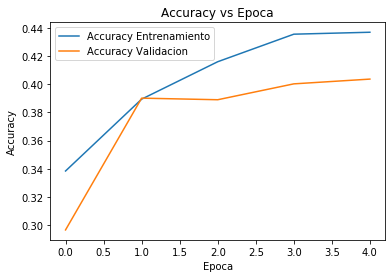

In [0]:
bestScore, bestModel, bestHist = GridSearch(x_train,y_train,x_test,y_test,parametros)
graficarHistoria(bestHist)

#Resultados

In [0]:
resultadosEntrenamiento.calcularF1Micro()

0.5143608748883227

In [0]:
y_pred_train = modeloCargado.predict_classes(x_train)
y_pred_test = modeloCargado.predict_classes(x_test)

In [0]:
resultadosEntrenamiento = Resultados(y_train, y_pred_train)
resultadosValidacion = Resultados(y_test, y_pred_test)

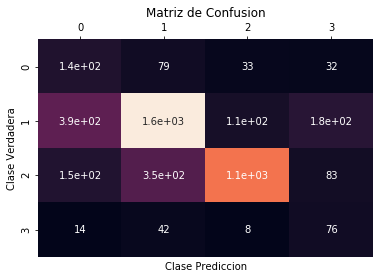

In [0]:
#resultadosEntrenamiento.graficarMatrizConfusion()
resultadosValidacion.graficarMatrizConfusion()